In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [46]:
t_df=pd.read_csv('Titanic_train.csv')

In [47]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [48]:
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
t_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


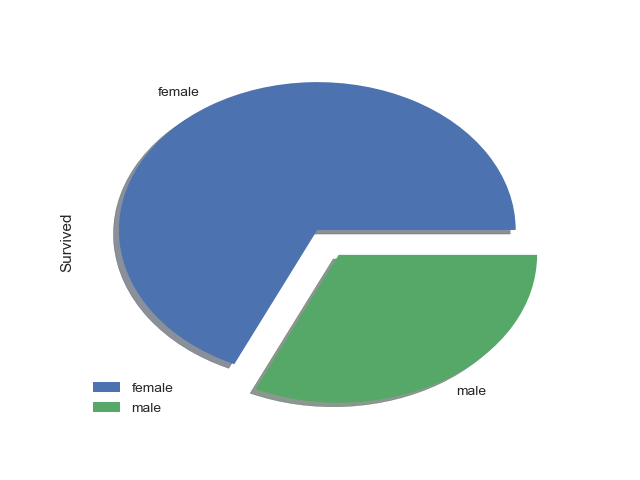

<IPython.core.display.Javascript object>


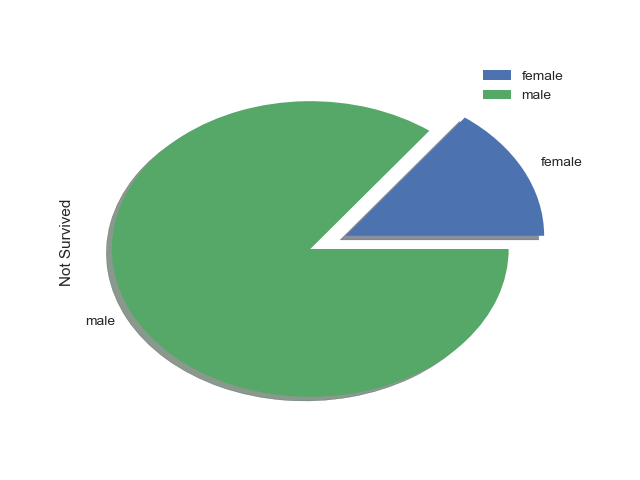

In [50]:
%matplotlib notebook
sns.set()

sex_survived=t_df[t_df['Survived']==1]
sex_survived=sex_survived.groupby(by='Sex')
sex_survived=pd.DataFrame(sex_survived.count())
sex_survived.plot.pie(y='Survived', explode=[0.1,0.1],shadow=True)

sex_notsurvived=t_df[t_df['Survived']==0]
sex_notsurvived=sex_notsurvived.groupby(by='Sex')
sex_notsurvived=pd.DataFrame(sex_notsurvived.count())
sex_notsurvived=sex_notsurvived.rename(columns={'Survived':'Not Survived'})
sex_notsurvived.plot.pie(y='Not Survived', explode=[0.1,0.1],shadow=True)



<IPython.core.display.Javascript object>


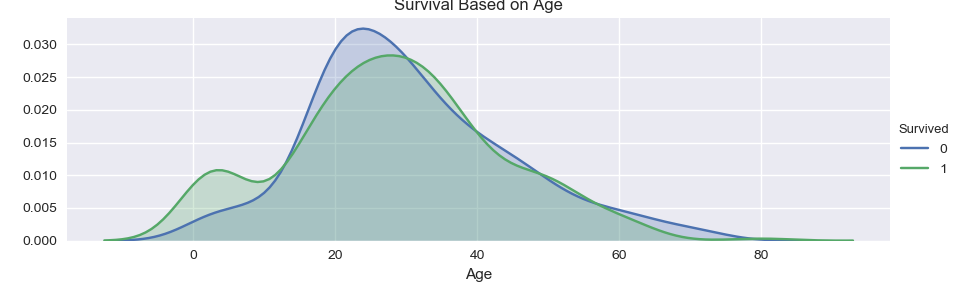

Text(0.5,1,'Survival Based on Age')

In [78]:
graph = sns.FacetGrid(t_df, hue="Survived",aspect=3)
graph.map(sns.kdeplot,'Age',shade= True)
graph.add_legend()
plt.title("Survival Based on Age")

<IPython.core.display.Javascript object>


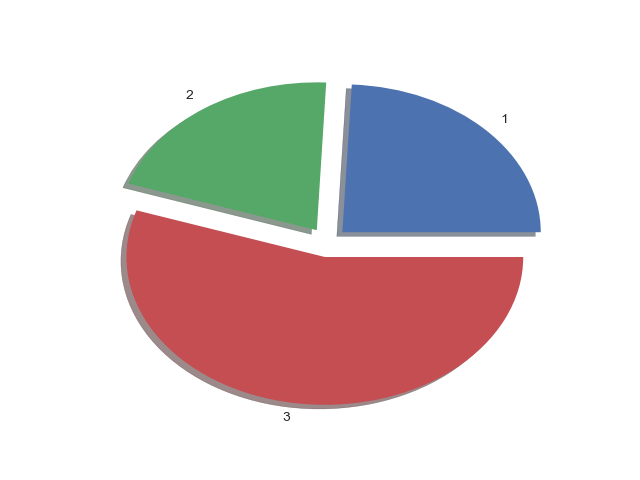

In [51]:
pclass=t_df.groupby(by='Pclass')
pclass=pd.DataFrame(pclass.count())
plt.figure()
plt.pie(pclass['Survived'],explode=[0.1, 0.1, 0.1], labels=pclass.index,shadow=True)
plt.show()

Text(0.5,1,'Survival Based on Fare')

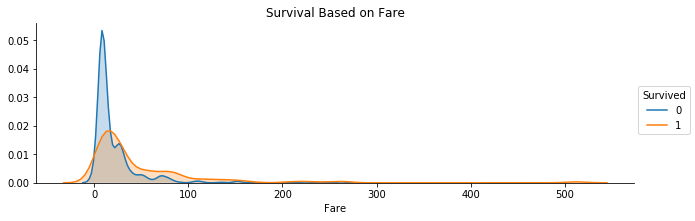

In [3]:
graph = sns.FacetGrid(t_df, hue="Survived",aspect=3)
graph.map(sns.kdeplot,'Fare',shade= True)
graph.add_legend()
plt.title("Survival Based on Fare")

<IPython.core.display.Javascript object>


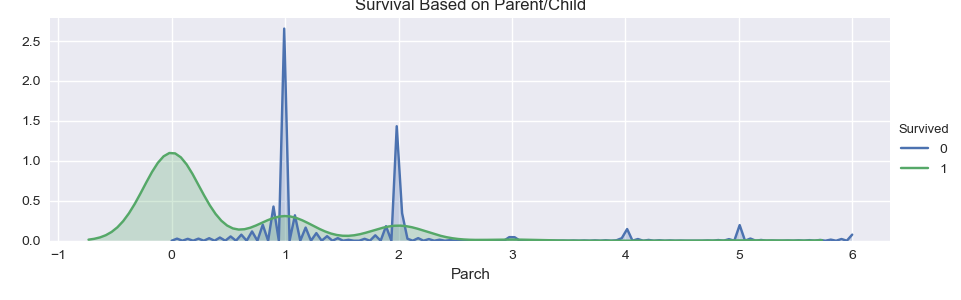

Text(0.5,1,'Survival Based on Parent/Child')

In [52]:
graph = sns.FacetGrid(t_df, hue="Survived",aspect=3)
graph.map(sns.kdeplot,'Parch',shade= True)
graph.add_legend()
plt.title("Survival Based on Parent/Child")

In [18]:
embarked=t_df.groupby(['Embarked'])
embarked=pd.DataFrame(embarked.count())
embarked.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)
embarked

,Survived,Pclass,Sex,Age,SibSp,Parch
Embarked,,,,,,
C,168,168,168,130,168,168
Q,77,77,77,28,77,77
S,644,644,644,554,644,644


<IPython.core.display.Javascript object>


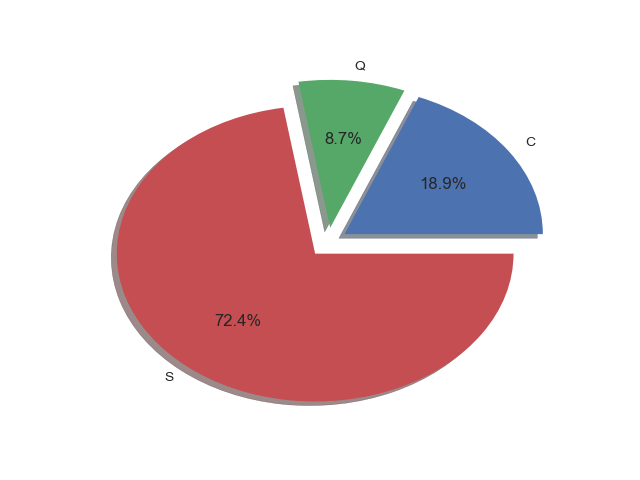

In [53]:
plt.figure()
plt.pie(embarked['Survived'],explode=[0.1, 0.1, 0.1], labels=embarked.index,autopct='%1.1f%%',shadow=True)
plt.show()

In [105]:
embarked=t_df.groupby(['Embarked','Survived'])
embarked=pd.DataFrame(embarked.size(),index=None)
embarked

0
Embarked Survived     
C        0          75
         1          93
Q        0          47
         1          30
S        0         427
         1         217

In [54]:
t_df=t_df.drop(['Name','PassengerId','Ticket','Cabin','Fare','SibSp'],axis=1)
t_df=t_df.join(pd.get_dummies(t_df['Sex']))
t_df=t_df.join(pd.get_dummies(t_df['Embarked']))
t_df=t_df.drop(['Sex','Embarked'],axis=1)
t_df=t_df.dropna()

In [55]:
Y_train=t_df['Survived']
t_df.drop(['Survived'], axis=1,inplace=True)
X_train=t_df

In [56]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
df_test=pd.read_csv('Titanic_test.csv')

In [58]:
index = df_test['Age'].index[df_test['Age'].apply(np.isnan)]

In [59]:
df_test=df_test.drop(['Name','PassengerId','Ticket','Cabin','Fare','SibSp'],axis=1)
df_test=df_test.join(pd.get_dummies(df_test['Sex']))
df_test=df_test.join(pd.get_dummies(df_test['Embarked']))

In [60]:
df_test=df_test.drop(['Sex','Embarked'],axis=1)
df_test=df_test.dropna()

In [61]:
X_test=df_test
df_actual=pd.read_csv('gender_submission.csv')
df_actual.drop(df_actual.index[index],inplace=True)
Y_actual=df_actual['Survived']

In [62]:
rf.score(X_test,Y_actual)

0.8253012048192772

In [63]:
data = [t_df, df_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

,Pclass,Age,Parch,female,male,C,Q,S
0,3,2,0,0,1,0,0,1
1,1,5,0,1,0,1,0,0
2,3,3,0,1,0,0,0,1
3,1,5,0,1,0,0,0,1
4,3,5,0,0,1,0,0,1


In [65]:
X_train=t_df
X_test=df_test

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)